## Importacion de librerias / library charges 

In [2]:
# En la documentacion de este notebook podra obtener el detalle de cada columna y procesos hechos aqui.
# Document of this notebook can help you to understand all columns and process do here  

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pymongo
import random
import json
import os
import statistics
import math
import gspread
import gspread

In [16]:
ruta_credenciales = os.path.expanduser('~/Documents/Projectos_data/Stepn_Data_project/credenciales.json')
gc = gspread.service_account(filename=ruta_credenciales)


#### Carga de de archivo .CSV / Load CSV file 

In [17]:
# data = pd.read_csv('CorridasStepn-SolanaRealm.csv') #CSV LOCAL 

In [18]:
# En el caso de que el archivo csv quede desactualizado, podemos optar por una peticion directa al link del GDrive

In [21]:
# Abre la hoja de cálculo por URL
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/11qE8JHSpsLOLWvAR36p7q-kwv-TbI2VC8fCFpR91aV8/edit?usp=sharing')

# O abrela por título
# sh = gc.open('Corridas Stepn')


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Energias                  446 non-null    float64
 1   ZAPA                      446 non-null    object 
 2   Gst ganado                331 non-null    float64
 3   Arreglo Gst               443 non-null    float64
 4   Coste de caja gst         153 non-null    float64
 5   GMT                       121 non-null    float64
 6   Total GST                 401 non-null    float64
 7   Caja mb                   445 non-null    object 
 8   HP%                       425 non-null    float64
 9   Obtencion caja            155 non-null    object 
 10  Upgrades                  366 non-null    float64
 11  TOTAL FECHA GST           395 non-null    float64
 12  TOTAL USDT FECHA          148 non-null    float64
 13  Fecha                     446 non-null    object 
 14  Aclaracion

In [23]:
# Dias de movimiento
# Days of running

daysactive = data['Fecha'].value_counts()
daysactive.info()


<class 'pandas.core.series.Series'>
Index: 305 entries, 11/5/23 to 11/3/23
Series name: Fecha
Non-Null Count  Dtype
--------------  -----
305 non-null    int64
dtypes: int64(1)
memory usage: 4.8+ KB


In [24]:
# Realizamos una limpieza para quedarnos con las columnas competentes para este notebook 
# Delete some colummns of csv for this notebook project 

In [25]:
data = data.drop(data.columns[20:], axis=1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Energias                  446 non-null    float64
 1   ZAPA                      446 non-null    object 
 2   Gst ganado                504 non-null    float64
 3   Arreglo Gst               504 non-null    float64
 4   Coste de caja gst         504 non-null    float64
 5   GMT                       504 non-null    float64
 6   Total GST                 401 non-null    float64
 7   Caja mb                   445 non-null    object 
 8   HP%                       425 non-null    float64
 9   Obtencion caja            155 non-null    object 
 10  Upgrades                  504 non-null    float64
 11  TOTAL FECHA GST           395 non-null    float64
 12  TOTAL USDT FECHA          504 non-null    float64
 13  Fecha                     446 non-null    object 
 14  Aclaracion

In [27]:
# Cuantas energias se usaron?
# How many energy used?

sum_total_energy = data['Energias'].sum()

print(f'El total de energias usadas es de {sum_total_energy}')



El total de energias usadas es de 5432.1


#### Cuantos zapatillas tiene activas esta cuenta?
#### How many sneakers have active this account?

In [47]:
sneakers = data['ZAPA'].unique()
sneakers

array(['WL-925 ', 'WEG-579', 'WL-925', 'WEGMT-889', 'UNC-WL-432',
       'UNC-WEG-168', 'RAREMHTE-020', 'RARE-WL-1041', 'UNCO-WG-2524',
       'C-T-946', 'UNCJG-ER-269', 'TEO -638', nan], dtype=object)

In [57]:
# Uso de energia por cada zapatilla. 
# Total of energy with wich sneaker nft. 

total_exs = data.groupby('ZAPA')['Energias'].sum().reset_index()

# Ordenando de forma descendente.
# Order by desc

total_exs = total_exs.sort_values(by='Energias', ascending=False)
total_exs

,ZAPA,Energias
1,RARE-WL-1041,1045.9
2,RAREMHTE-020,908.0
5,UNC-WL-432,869.5
4,UNC-WEG-168,731.4
0,C-T-946,716.6
8,WEG-579,377.0
3,TEO -638,284.0
10,WL-925,181.2
9,WEGMT-889,162.7
11,WL-925,77.2


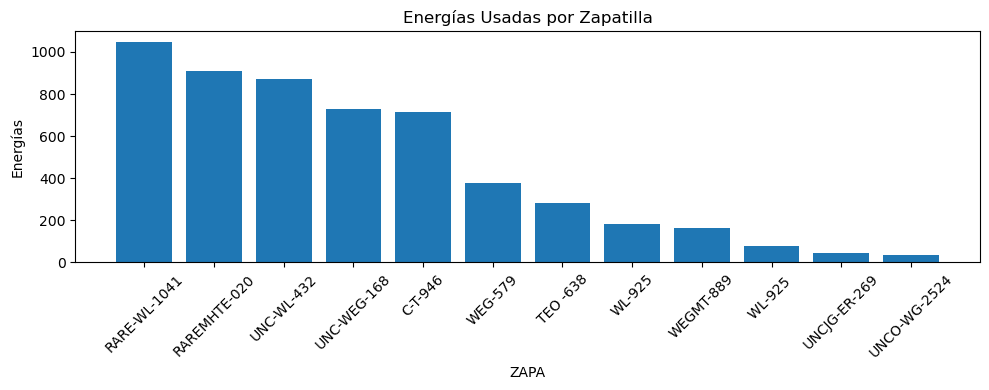

In [69]:
# Crear el gráfico de barras
# Make graph 

plt.figure(figsize=(10, 4))
plt.bar(total_exs['ZAPA'], total_exs['Energias'])
plt.xlabel('ZAPA')
plt.ylabel('Energías')
plt.title('Energías Usadas por Zapatilla')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Obtencion de cajas.
#### Collected MYSTERY BOXES.

In [92]:
# Filtrar los valores válidos
valores_validos = ['3', '4', '5', '6', '7', '8', '9', 'F']
filt_data = data[data['Caja mb'].isin(valores_validos)]

# Calcular la cantidad de números y letras F
total_numeros = filt_data[filt_data['Caja mb'].str.isnumeric()]['Caja mb'].count()
total_F = filt_data[filt_data['Caja mb'] == 'F']['Caja mb'].count()

# Calcular la frecuencia de cada número
frecuencia_numeros = filt_data[filt_data['Caja mb'].str.isnumeric()]['Caja mb'].value_counts().to_dict()


print(f'El total de cajas obtenidas es de : {total_numeros}')
print(f'El total de F es de : {total_F}')
print(f'Se obtuvieron las siguientes cajas : {frecuencia_numeros}')

El total de cajas obtenidas es de : 158
El total de F es de : 287
Se obtuvieron las siguientes cajas : {'6': 54, '5': 49, '4': 28, '8': 9, '3': 9, '7': 8, '9': 1}


In [89]:
# Vamos a remplazar todos los valores 'null' en 0, dado el caracter especifico de esta columna.
# Replace all 'null' data for 0 for context in this column.

data['TOTAL USDT FECHA'] = data['TOTAL USDT FECHA'].fillna(0)

# Sumamos los valores para saber cual es el total de USDT generados en esta cuenta.
# Sum all values for now how much USDT make this account.

sum_total_usdt = data['TOTAL USDT FECHA'].sum()

# TOTAL 

print(f'Total es {sum_total_usdt}')
print(f'Total is {sum_total_usdt}')



Total es 1392.08
Total is 1392.08


### Minado de monedas
### CoinMaker

In [31]:
data['GMT'] = data['GMT'].fillna(0)
sum_total_gmt = data['GMT'].sum()

print(f'El total de GMT minado es {sum_total_gmt}')


data['Gst ganado'] = data['Gst ganado'].fillna(0)
sum_total_gst = data['Gst ganado'].sum()

print(f'El total de GMT minado es {sum_total_gst}')



El total de GMT minado es 1174.38
El total de GMT minado es 64927.79


In [42]:
# Cuantas energias se usaron para minar GMT y GST?
# How many energys used for minning GMT y GST?

# Sabemos que hay 2 sneakers historicas que han realizado GMT minning como uso , las de mas son para Gst
# We kmow only 2 sneakers can earned Gmt, else are only for GST.

#Zapatillas GMT ;
# WEGMT-889 - RARE-WL-1041

energias_gmt = data.loc[data['ZAPA'].isin(['RARE-WL-1041', 'WEGMT-889']), 'Energias']
energiassum_gmt = energias_gmt.sum()


print(f'Energias usadas para el gmt minning {energiassum_gmt}')


#Zapatillas GST ;
# WL-925 ', 'WEG-579', 'WL-925', 'UNC-WL-432',
#'UNC-WEG-168', 'RAREMHTE-020', 'UNCO-WG-2524',
#'C-T-946', 'UNCJG-ER-269', 'TEO -638'
        
        
energias_gst = data.loc[data['ZAPA'].isin(['WEG-579','UNC-WL-432','C-T-946', 'UNCJG-ER-269','UNCO-WG-2524','RAREMHTE-020','UNC-WEG-168','WL-925']), 'Energias']
energiassum_gst = energias_gst.sum()
print(f'Energias usadas para el gst minning {energiassum_gst}')

# Porcentaje de minado en energias
# Distruibuited energys for minning

#total de energias 
total_energys = energiassum_gst + energiassum_gmt
print(f'Total de energias  {total_energys}')

#porcentaje energia/gst 
porcengst = energiassum_gst/total_energys

print(f'Porcentaje de gst minado {porcengst}')

#porcentaje energia/gmt 
porcengmt = energiassum_gmt/total_energys
print(f'«Porcentaje de gmt minado {porcengmt}')


Energias usadas para el gmt minning 1208.6000000000001
Energias usadas para el gst minning 3862.2999999999997
Total de energias  5070.9
Porcentaje de gst minado 0.7616596659370132
«Porcentaje de gmt minado 0.23834033406298688


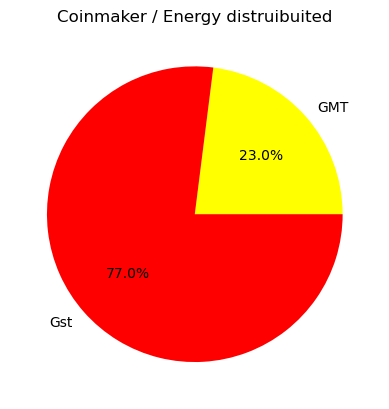

In [33]:
# Creamos un grafico de torta donde podemos ver los earning hechos a escala por energia
# Making a cake graphic for  showed earned at scale per energy

# Datos de ejemplo
labels = ['GMT', 'Gst']
values = [23, 77]
colors = ['yellow', 'red']

# Crear el gráfico de torta
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')

# Coin maker results
plt.title('Coinmaker / Energy distruibuited')

# Mostrar el gráfico
plt.show()


In [34]:
# Debemos de restar los gastos en reparaciones de zapatillas, costos de apertura de cajas, actualizaciones de gemas
# Have to consider and discount repair sneakers, opened boxes fee and gems upgrades


## Gst quemado para mbs 
## Gst burned for mbs

data['Coste de caja gst'] = data['Coste de caja gst'].fillna(0)
burnedgst_mb = data['Coste de caja gst'].sum()
print(f'El total de gst quemado es por cajas es {burnedgst_mb}')
print(f'Total for mbs opened {burnedgst_mb}')


## Gst quemado para reparaciones  
## Gst burned for repair sneakers 

data['Arreglo Gst'] = data['Arreglo Gst'].fillna(0)
repaircostgst = data['Arreglo Gst'].sum()
print(f'El total de gst quemado por reparaciones es {repaircostgst}')
print(f'Total for repair sneakers {repaircostgst}')


## Gst quemado para actualizaciones 
## Gst burned for upgrades 

data['Upgrades'] = data['Upgrades'].fillna(0)
upgradesgst = data['Upgrades'].sum()
print(f'El total de gst quemado por actualizaciones de gemas {upgradesgst}')
print(f'Total for gems upgrades {upgradesgst}')

El total de gst quemado es por cajas es 38306.5
Total for mbs opened 38306.5
El total de gst quemado por reparaciones es 5100.5599999999995
Total for repair sneakers 5100.5599999999995
El total de gst quemado por actualizaciones de gemas 37200.0
Total for gems upgrades 37200.0


### Analisis de intentos y tasa de exito en actualizaciones de gemas
### Attempts analysis and success rate of upgraded gems

In [35]:
# Creamos un conteo de tasa de exito en los upgrades de los distintos niveles.
# Make counter for success rate in upgrades of all levels.

conteolv1 = data['Success LV1'].value_counts()
conteolv2 = data['Success LV2'].value_counts()
conteolv3 = data['Success LV3'].value_counts()
conteolv4 = data['Success LV4'].value_counts()


print(f'Cantidad de datos en lv1 {conteolv1}')
print(f'Cantidad de datos en lv2 {conteolv2}')
print(f'Cantidad de datos en lv3 {conteolv3}')
print(f'Cantidad de datos en lv4 {conteolv4}')





Cantidad de datos en lv1 NO     134
YES     63
Name: Success LV1, dtype: int64
Cantidad de datos en lv2 NO     66
YES    62
Name: Success LV2, dtype: int64
Cantidad de datos en lv3 YES    98
NO     55
Name: Success LV3, dtype: int64
Cantidad de datos en lv4 YES    4
NO     1
Name: Success LV4, dtype: int64


In [36]:
# Mostrar porcentajes tasa
# Show porcentual rate

#lv1
total_yeslv1 = conteolv1['YES']
total_nolv1 = conteolv1['NO']

ratelv1 = (total_yeslv1 / (total_yeslv1 + total_nolv1)) * 100

print(f'tasa exito % {ratelv1}')
print(f'success rate % {ratelv1}')



#lv2
total_yeslv2 = conteolv2['YES']
total_nolv2 = conteolv2['NO']

ratelv2 = (total_yeslv2 / (total_yeslv2 + total_nolv2)) * 100

print(f'tasa exito % {ratelv2}')
print(f'success rate % {ratelv2}')



#lv3
total_yeslv3 = conteolv3['YES']
total_nolv3 = conteolv3['NO']

ratelv3 = (total_yeslv3 / (total_yeslv3 + total_nolv3)) * 100

print(f'tasa exito % {ratelv3}')
print(f'success rate % {ratelv3}')



#lv4
total_yeslv4 = conteolv4['YES']
total_nolv4 = conteolv4['NO']

ratelv4 = (total_yeslv4 / (total_yeslv4 + total_nolv4)) * 100

print(f'tasa exito % {ratelv4}')
print(f'success rate % {ratelv4}')


tasa exito % 31.979695431472084
success rate % 31.979695431472084
tasa exito % 48.4375
success rate % 48.4375
tasa exito % 64.05228758169935
success rate % 64.05228758169935
tasa exito % 80.0
success rate % 80.0


#### Interactuando con NOsql

In [37]:
from pymongo import MongoClient
Stepnosql = MongoClient()

In [38]:
# Creando una base de datos 
# Create data base 

db = Stepnosql["DBSJM"]

# Creando una coleccion
# Create coleccion 


sneakers = db["sneakers"]



In [39]:
# Commons
sneakers.insert_one({"Rarity": "Common", "Type": "Walker", "Code": "WL-925"})
sneakers.insert_one({"Rarity": "Common", "Type": "Jogger", "Code": "valor2"})
sneakers.insert_one({"Rarity": "Common", "Type": "Runner", "Code": "valor3"})
sneakers.insert_one({"Rarity": "Common", "Type": "Trainer", "Code": "C-T-946"})

# Uncommons
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "WEGMT-889"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "WEG-579"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "UNC-WL-432"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "UNC-WEG-168"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Walker", "Code": "UNCO-WG-2524"})
sneakers.insert_one({"Rarity": "Uncommon", "Type": "Jogger", "Code": "UNCJG-ER-269"})


# Rare
sneakers.insert_one({"Rarity": "Rare", "Type": "Walker", "Code": "RARE-WL-1041"})
sneakers.insert_one({"Rarity": "Rare", "Type": "Jogger", "Code": "RAREMHTE-020"})
sneakers.insert_one({"Rarity": "Rare", "Type": "Runner", "Code": "valor3"})
sneakers.insert_one({"Rarity": "Rare", "Type": "Trainer", "Code": "valor4"})

# Epic
sneakers.insert_one({"Rarity": "Epic", "Type": "Walker", "Code": "WL-925"})
sneakers.insert_one({"Rarity": "Epic", "Type": "Jogger", "Code": "valor2"})
sneakers.insert_one({"Rarity": "Epic", "Type": "Runner", "Code": "valor3"})
sneakers.insert_one({"Rarity": "Epic", "Type": "Trainer", "Code": "valor4"})


ServerSelectionTimeoutError: localhost:27017: [Errno 61] Connection refused, Timeout: 30s, Topology Description: <TopologyDescription id: 64ecf19ba2e8e1e8015eb807, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 61] Connection refused')>]>

In [ ]:
test = db.sneakers.find()

for document in test:
    print(document)

In [ ]:
data_filtrada = data[data['ZAPA'] == 'WEGMT-889']



In [68]:
# Conexión a la base de datos
Stepnosql = MongoClient()

# Obtén el DataFrame filtrado
data_filtrada = data[data['ZAPA'] == 'WEGMT-889']

# Convierte el DataFrame en una lista de documentos
documentos = data_filtrada.to_dict(orient='records')

# Inserta los documentos en la colección "clientes"
collection = db['DBSJM']
collection.insert_many(documentos)


ServerSelectionTimeoutError: localhost:27017: [Errno 61] Connection refused, Timeout: 30s, Topology Description: <TopologyDescription id: 64ecf19ba2e8e1e8015eb807, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 61] Connection refused')>]>

## Probabilidades y teorias estadisticas, fuera de este dataset.
## Probabilities and statistical theories, outside the dataset.

##### Probabilidad de Rainbow Gem lv3 (5,20,100)
##### Success Rate Rainbow Gem lv3 (5,20,100)

In [ ]:
#### Primer resultado del archivo creado - intentos para 5 gema rainbow lv3
#### First result of archive json created -  attemps for 5 gem rainbow lv3

def simular_intentos():
    intentos = 0
    intentos_fallidos = []
    intentos_exitosos = []
    intentos_exitosos_gran_premio = []

    while True:
        intentos += 1
        if random.random() >= 0.65:
            intentos_fallidos.append(intentos)
        else:
            intentos_exitosos.append(intentos)
            if random.random() <= 0.005:
                intentos_exitosos_gran_premio.append(intentos)
                break

    return intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio

resultados = []
num_simulaciones = 5  # Número de simulaciones a realizar

for _ in range(num_simulaciones):
    intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio = simular_intentos()
    resultados.append((intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio))

ruta_archivo = "/Users/lucasmorrone/Documents/Projectos_data/Stepn_Data_project/Codigo_Probabilidad/resultados.json"

# Guardar resultados en archivo JSON en la ruta especificada
with open(ruta_archivo, "w") as archivo:
    json.dump(resultados, archivo)

# Cargar resultados desde el archivo JSON
with open(ruta_archivo, "r") as archivo:
    resultados = json.load(archivo)

# Obtener los conteos de intentos fallidos, intentos exitosos y intentos exitosos con gran premio
conteos_intentos_fallidos = []
conteos_intentos_exitosos = []
conteos_intentos_exitosos_gran_premio = []

for intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio in resultados:
    conteos_intentos_fallidos.extend(intentos_fallidos)
    conteos_intentos_exitosos.extend(intentos_exitosos)
    conteos_intentos_exitosos_gran_premio.extend(intentos_exitosos_gran_premio)

# Calcular la moda y la media de los conteos de intentos fallidos
moda_intentos_fallidos = statistics.mode(conteos_intentos_fallidos)
media_intentos_fallidos = statistics.mean(conteos_intentos_fallidos)

# Calcular la moda y la media de los conteos de intentos exitosos
moda_intentos_exitosos = statistics.mode(conteos_intentos_exitosos)
media_intentos_exitosos = statistics.mean(conteos_intentos_exitosos)

# Calcular la moda y la media de los conteos de intentos exitosos con gran premio
moda_intentos_exitosos_gran_premio = statistics.mode(conteos_intentos_exitosos_gran_premio)
media_intentos_exitosos_gran_premio = statistics.mean(conteos_intentos_exitosos_gran_premio)

# Calcular el número total de intentos
total_intentos = len(conteos_intentos_fallidos) + len(conteos_intentos_exitosos)

print("Moda de los intentos fallidos:", moda_intentos_fallidos)
print("Media de los intentos fallidos:", media_intentos_fallidos)
print("Total de los intentos fallidos:", len(conteos_intentos_fallidos))

print("Moda de los intentos exitosos:", moda_intentos_exitosos)
print("Media de los intentos exitosos:", media_intentos_exitosos)
print("Media de los intentos exitosos:", len(conteos_intentos_exitosos))

print("Moda de los intentos exitosos con gran premio:", moda_intentos_exitosos_gran_premio)
print("Media de los intentos exitosos con gran premio:", media_intentos_exitosos_gran_premio)

print("Total de intentos totales para 5 gemas rainbow lv3:", total_intentos)


In [ ]:
#### Primer resultado del archivo creado - intentos para 20 gema rainbow lv3
#### First result of archive json created -  attemps for 20 gem rainbow lv3

def simular_intentos():
    intentos = 0
    intentos_fallidos = []
    intentos_exitosos = []
    intentos_exitosos_gran_premio = []

    while True:
        intentos += 1
        if random.random() >= 0.65:
            intentos_fallidos.append(intentos)
        else:
            intentos_exitosos.append(intentos)
            if random.random() <= 0.005:
                intentos_exitosos_gran_premio.append(intentos)
                break

    return intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio

resultados = []
num_simulaciones = 20  # Número de simulaciones a realizar

for _ in range(num_simulaciones):
    intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio = simular_intentos()
    resultados.append((intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio))

ruta_archivo = "/Users/lucasmorrone/Documents/Projectos_data/Stepn_Data_project/Codigo_Probabilidad/resultados.json"

# Guardar resultados en archivo JSON en la ruta especificada
with open(ruta_archivo, "w") as archivo:
    json.dump(resultados, archivo)

# Cargar resultados desde el archivo JSON
with open(ruta_archivo, "r") as archivo:
    resultados = json.load(archivo)

# Obtener los conteos de intentos fallidos, intentos exitosos y intentos exitosos con gran premio
conteos_intentos_fallidos = []
conteos_intentos_exitosos = []
conteos_intentos_exitosos_gran_premio = []

for intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio in resultados:
    conteos_intentos_fallidos.extend(intentos_fallidos)
    conteos_intentos_exitosos.extend(intentos_exitosos)
    conteos_intentos_exitosos_gran_premio.extend(intentos_exitosos_gran_premio)

# Calcular la moda y la media de los conteos de intentos fallidos
moda_intentos_fallidos = statistics.mode(conteos_intentos_fallidos)
media_intentos_fallidos = statistics.mean(conteos_intentos_fallidos)

# Calcular la moda y la media de los conteos de intentos exitosos
moda_intentos_exitosos = statistics.mode(conteos_intentos_exitosos)
media_intentos_exitosos = statistics.mean(conteos_intentos_exitosos)

# Calcular la moda y la media de los conteos de intentos exitosos con gran premio
moda_intentos_exitosos_gran_premio = statistics.mode(conteos_intentos_exitosos_gran_premio)
media_intentos_exitosos_gran_premio = statistics.mean(conteos_intentos_exitosos_gran_premio)

# Calcular el número total de intentos
total_intentos = len(conteos_intentos_fallidos) + len(conteos_intentos_exitosos)

print("Moda de los intentos fallidos:", moda_intentos_fallidos)
print("Media de los intentos fallidos:", media_intentos_fallidos)
print("Total de los intentos fallidos:", len(conteos_intentos_fallidos))

print("Moda de los intentos exitosos:", moda_intentos_exitosos)
print("Media de los intentos exitosos:", media_intentos_exitosos)
print("Media de los intentos exitosos:", len(conteos_intentos_exitosos))

print("Moda de los intentos exitosos con gran premio:", moda_intentos_exitosos_gran_premio)
print("Media de los intentos exitosos con gran premio:", media_intentos_exitosos_gran_premio)

print("Total de intentos totales para 20 gemas rainbow lv3:", total_intentos)


In [ ]:
#### Primer resultado del archivo creado - intentos para 100 gema rainbow lv3
#### First result of archive json created -  attemps for 100 gem rainbow lv3

def simular_intentos():
    intentos = 0
    intentos_fallidos = []
    intentos_exitosos = []
    intentos_exitosos_gran_premio = []

    while True:
        intentos += 1
        if random.random() >= 0.65:
            intentos_fallidos.append(intentos)
        else:
            intentos_exitosos.append(intentos)
            if random.random() <= 0.005:
                intentos_exitosos_gran_premio.append(intentos)
                break

    return intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio

resultados = []
num_simulaciones = 100  # Número de simulaciones a realizar

for _ in range(num_simulaciones):
    intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio = simular_intentos()
    resultados.append((intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio))

ruta_archivo = "/Users/lucasmorrone/Documents/Projectos_data/Stepn_Data_project/Codigo_Probabilidad/resultados.json"

# Guardar resultados en archivo JSON en la ruta especificada
with open(ruta_archivo, "w") as archivo:
    json.dump(resultados, archivo)

# Cargar resultados desde el archivo JSON
with open(ruta_archivo, "r") as archivo:
    resultados = json.load(archivo)

# Obtener los conteos de intentos fallidos, intentos exitosos y intentos exitosos con gran premio
conteos_intentos_fallidos = []
conteos_intentos_exitosos = []
conteos_intentos_exitosos_gran_premio = []

for intentos_fallidos, intentos_exitosos, intentos_exitosos_gran_premio in resultados:
    conteos_intentos_fallidos.extend(intentos_fallidos)
    conteos_intentos_exitosos.extend(intentos_exitosos)
    conteos_intentos_exitosos_gran_premio.extend(intentos_exitosos_gran_premio)

# Calcular la moda y la media de los conteos de intentos fallidos
moda_intentos_fallidos = statistics.mode(conteos_intentos_fallidos)
media_intentos_fallidos = statistics.mean(conteos_intentos_fallidos)

# Calcular la moda y la media de los conteos de intentos exitosos
moda_intentos_exitosos = statistics.mode(conteos_intentos_exitosos)
media_intentos_exitosos = statistics.mean(conteos_intentos_exitosos)

# Calcular la moda y la media de los conteos de intentos exitosos con gran premio
moda_intentos_exitosos_gran_premio = statistics.mode(conteos_intentos_exitosos_gran_premio)
media_intentos_exitosos_gran_premio = statistics.mean(conteos_intentos_exitosos_gran_premio)

# Calcular el número total de intentos
total_intentos = len(conteos_intentos_fallidos) + len(conteos_intentos_exitosos)

print("Moda de los intentos fallidos:", moda_intentos_fallidos)
print("Media de los intentos fallidos:", media_intentos_fallidos)
print("Total de los intentos fallidos:", len(conteos_intentos_fallidos))

print("Moda de los intentos exitosos:", moda_intentos_exitosos)
print("Media de los intentos exitosos:", media_intentos_exitosos)
print("Media de los intentos exitosos:", len(conteos_intentos_exitosos))

print("Moda de los intentos exitosos con gran premio:", moda_intentos_exitosos_gran_premio)
print("Media de los intentos exitosos con gran premio:", media_intentos_exitosos_gran_premio)

print("Total de intentos totales para 100 gemas rainbow lv3:", total_intentos)


In [ ]:
# Bonanza event, suponiendo que el raffle total es de 25 (2500gmt) en la categoria mayor. 75 (625) para segundo premio 
# 150 (200gmt) para el tercer premio

# Definir el número de ganadores y el número total de participantes


N_totaldeparticipantes = 1000

participantes_elite = N_totaldeparticipantes * 1 /100

participantes_pro = N_totaldeparticipantes * 10 /100

participantes_normales = N_totaldeparticipantes * 80 /100

participantes_newbies = N_totaldeparticipantes * 9 /100

num_ganadores3erpremio = 150
num_participantes3erpremio = N_totaldeparticipantes

num_ganadores2dopremio = 75
num_participantes2dopremio = participantes_pro + participantes_elite + participantes_normales 

num_ganadores1erpremio = 25
num_participantes1erpremio = participantes_pro + participantes_elite



# Calcular el porcentaje de éxito

porcentaje_exito3erpremio = (num_ganadores3erpremio / num_participantes3erpremio) * 100
porcentaje_exito2dopremio = (num_ganadores2dopremio / num_participantes2dopremio) * 100
porcentaje_exito1premio = (num_ganadores1erpremio / num_participantes1erpremio) * 100



# Imprimir el resultado primario
print(f"El porcentaje de éxito 1er premio es del {porcentaje_exito1premio:}%")
print(f"El porcentaje de éxito 2do premio es del {porcentaje_exito2dopremio:}%")
print(f"El porcentaje de éxito 3er premio es del {porcentaje_exito3erpremio:}%")



In [ ]:
# Bonus track /  Badges adventages 

# Tenemos un estimado que dentro de los participantes del evento, hay ventajas dependiendo sus badges/insignias.

# Se estima que el 20% de tiene 0,5x de obtener algun premio.
# Se estima que el 80% de tiene 1x de obtener algun premio.
# Se estima que el 10% tiene 2x de obtener algun premio
# Se estima que el 1% tiene 3x de obtener algun premio.


# Creemos que dentro del 3er premio y 2do premio, estarian los participantes todos los participantes

# Creemos que dentro del 2do premio y 1er premio, estarian los participantes x2 y x3


#Participantes con la posibilidad triple de ganar ;

# participantes_elite

#Participantes con la posibilidad doble de ganar ;

# participantes_pro

#Participantes con la posibilidad base de ganar ;

# participantes_normales

#Participantes con la mitad de posibilidad de ganar ;

# participantes_newbies



In [ ]:
# Elite 11 badges
Porcentaje_primerpremio_elitejugadores = porcentaje_exito1premio * 1.5

Porcentaje_segundorpremio_elitejugadores = (num_ganadores2dopremio / participantes_normales  * 3) * 100

Porcentaje_tercer_elitejugadores = (num_ganadores3erpremio / participantes_normales  * 3) * 100 


# PRO 8>= badges
Porcentaje_primerpremio_PROjugadores = porcentaje_exito1premio 

Porcentaje_segundorpremio_PROjugadores = (num_ganadores2dopremio / participantes_normales  * 2) * 100

Porcentaje_tercerpremio_PROjugadores = (num_ganadores3erpremio / participantes_normales  * 2) * 100


# Normales 5>= badges

Porcentaje_segundorpremio_jugadoresnormales = (num_ganadores2dopremio / participantes_normales ) * 100

Porcentaje_tercerpremio_jugadoresnormales = (num_ganadores3erpremio / participantes_normales ) * 100

# Newbies <5 badges

Porcentaje_segundorpremio_jugadoresnewbies = (num_ganadores2dopremio / participantes_normales / 2 ) * 100

Porcentaje_tercerpremio_jugadoresnewbies = (num_ganadores3erpremio / participantes_normales / 2 ) * 100


# Porcentaje de los jugadores Elite de ganar premios

print(f"Posibilidad de participantes Elite de ganar 1er premio es de: {Porcentaje_primerpremio_elitejugadores:}%")
print(f"Posibilidad de participantes Elite de ganar 2do premio es de: {Porcentaje_segundorpremio_elitejugadores:}%")
print(f"Posibilidad de participantes Elite de ganar 3er premio es de: {Porcentaje_tercer_elitejugadores:}%")


# Porcentaje de los jugadores PRO de ganar premios

print(f"Posibilidad de participantes PRO de ganar 1er premio es de: {Porcentaje_primerpremio_PROjugadores:}%")
print(f"Posibilidad de participantes PRO de ganar 2do premio es de: {Porcentaje_segundorpremio_PROjugadores:}%")
print(f"Posibilidad de participantes PRO de ganar 3er premio es de: {Porcentaje_tercerpremio_PROjugadores:}%")

# Porcentaje de los jugadores normales de ganar premios

print(f"Posibilidad de participantes normales de ganar 2do premio es de: {Porcentaje_segundorpremio_jugadoresnormales:}%")
print(f"Posibilidad de participantes normales de ganar 3er premio es de: {Porcentaje_tercerpremio_jugadoresnormales:}%")

# Porcentaje de los jugadores newbies de ganar premios

print(f"Posibilidad de participantes newbies de ganar 2do premio es de: {Porcentaje_segundorpremio_jugadoresnewbies:}%")
print(f"Posibilidad de participantes newbies de ganar 3er premio es de: {Porcentaje_tercerpremio_jugadoresnewbies:}%")
